In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
import pickle
import pandas as pd

data= pd.read_csv('/content/drive/MyDrive/ME683/Final ML models and pickle files/cuboid/polymer_merged_cuboid.csv')

In [ ]:
data

rho      E     nu    a    b    c        f1        f2        f3  \
0        920.000  1.000  0.400  1.0  2.0  8.0  0.987485  0.988297  0.988952   
1        900.000  1.380  0.420  1.0  2.0  8.0  0.982318  0.982887  0.983525   
2       1400.000  2.800  0.400  1.0  2.0  8.0  0.978755  0.980834  0.982996   
3       1490.000  6.000  0.350  1.0  2.0  8.0  0.961999  0.962285  0.965113   
4       1740.000  0.800  0.490  1.0  2.0  8.0  0.991499  0.992805  0.994411   
...          ...    ...    ...  ...  ...  ...       ...       ...       ...   
282492  1159.775  1.091  0.405  4.0  8.0  9.0  0.999135  0.999257  0.999276   
282493  1181.303  6.121  0.408  4.0  8.0  9.0  0.995207  0.995392  0.995952   
282494  1296.140  5.646  0.386  4.0  8.0  9.0  0.996725  0.997005  0.997064   
282495  1906.271  5.209  0.421  4.0  8.0  9.0  0.997794  0.997899  0.997914   
282496  1403.680  3.130  0.372  4.0  8.0  9.0  0.998300  0.998464  0.998616   

              f4  ...       f21       f22       f23       f24       f25  \
0       0.989568  ...  1.005184  1.006504  1.007279  1.008231  1.008527   
1       0.984575  ...  1.003252  1.004691  1.008078  1.009359  1.009531   
2       0.983527  ...  1.009662  1.010879  1.011256  1.013431  1.014195   
3       0.967011  ...  1.008717  1.008762  1.016295  1.017102  1.017695   
4       0.995036  ...  1.004288  1.004557  1.004758  1.005418  1.006616   
...          ...  ...       ...       ...       ...       ...       ...   
282492  0.999282  ...  1.000437  1.000555  1.000614  1.000740  1.000786   
282493  0.997210  ...  1.002223  1.002491  1.002730  1.002887  1.002903   
282494  0.997664  ...  1.000811  1.001316  1.001402  1.002016  1.002673   
282495  0.997934  ...  1.000918  1.000998  1.001136  1.001159  1.001771   
282496  0.998649  ...  1.000552  1.000556  1.000887  1.000966  1.001193   

             f26       f27       f28       f29       f30  
0       1.008992  1.010188  1.010613  1.011200  1.011248  
1       1.011175  1.012255  1.013992  1.015662  1.016843  
2       1.015234  1.016604  1.016993  1.018041  1.018829  
3       1.024019  1.024360  1.026227  1.027848  1.031468  
4       1.007267  1.008403  1.008599  1.008618  1.008808  
...          ...       ...       ...       ...       ...  
282492  1.000854  1.000856  1.000905  1.000919  1.000943  
282493  1.003380  1.003422  1.003788  1.004615  1.005007  
282494  1.002797  1.003127  1.003227  1.003773  1.004100  
282495  1.001987  1.002047  1.002200  1.002286  1.002327  
282496  1.001235  1.001359  1.001370  1.001565  1.001672  

[282497 rows x 36 columns]

In [ ]:
X = data[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'nu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
xgb_model = XGBRegressor(n_estimators=150000, random_state=42, learning_rate=0.003)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.003, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 0.13454879807272285
Mean Squared Error for mu: 0.000826054489462238


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
# results_df['Actual_mu'] /= 10000
# results_df['Predicted_mu'] /= 10000
# results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')
print(results_df)

Mean Absolute Error for E: 0.2590231401089018
Mean Absolute Error for mu: 0.02309972210090772
Standard Deviation for E: 0.25976854617035383
Standard Deviation for mu: 0.017104411410509234
Mean Absolute percentage Error for E: 9.328302812165568
Mean Absolute percentage Error for mu: 5.6158474799993305
Mode Percentage Error for E: ModeResult(mode=1.0, count=285) 
Mode Percentage Error for E: ModeResult(mode=0.4, count=41) 
Median Percentage Error for E: 5.829275504876459
Median Percentage Error for mu: 4.794620987552927
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        3.256     3.293858  0.037858      0.373      0.427653  0.054653   
1        0.968     0.936591  0.031409      0.431      0.420168  0.010832   
2        4.599     4.394580  0.204420      0.414      0.423854  0.009854   
3        6.276     6.110968  0.165032      0.361      0.396795  0.035795   
4        3.440     3.393348  0.046652      0.394      0.396826  0.002826   
...        ...      

Mean Absolute Error for E: 0.2590231401089018
Mean Absolute Error for mu: 0.02309972210090772
Standard Deviation for E: 0.25976854617035383
Standard Deviation for mu: 0.017104411410509234


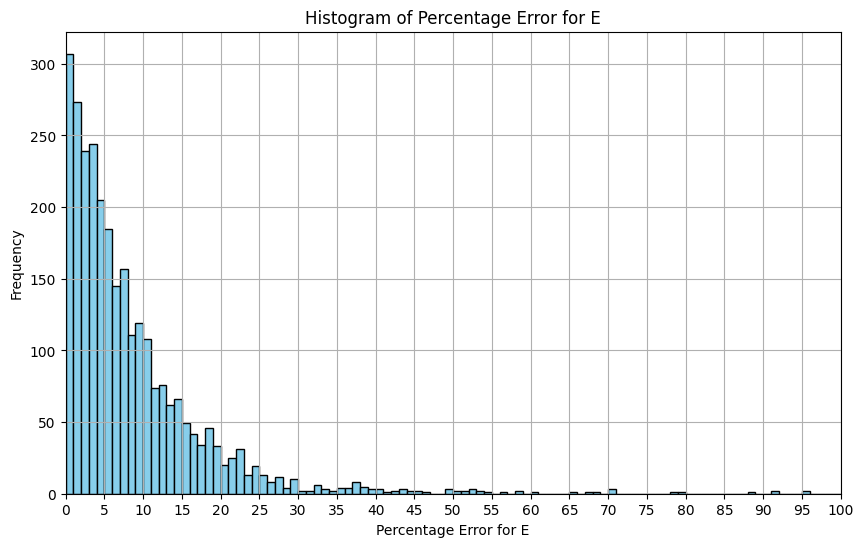

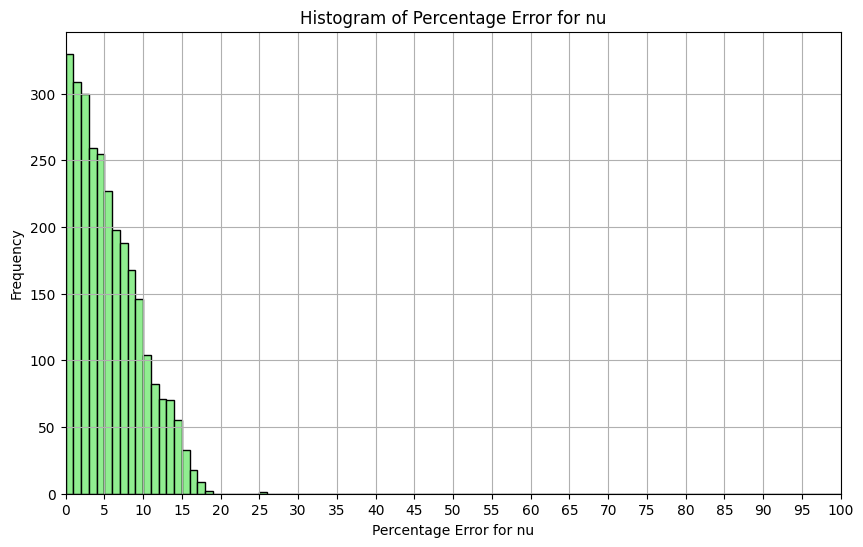

Maximum Percentage Error for E: 409.4567934672038
Minimum Percentage Error for E: 0.00442968965913462
Maximum Percentage Error for mu: 25.73061717881097
Minimum Percentage Error for mu: 0.006771664931174268


In [ ]:
import matplotlib.pyplot as plt



print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'polymers_xgb_no_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('polymers_xgb_no_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Scaled**

---



In [ ]:
# Assuming dataf is your DataFrame
data['E'] *= 10
data['nu'] *= 10000
X = data[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'nu']]
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
Y

E      nu
0       10.00  4000.0
1       13.80  4200.0
2       28.00  4000.0
3       60.00  3500.0
4        8.00  4900.0
...       ...     ...
282492  10.91  4050.0
282493  61.21  4080.0
282494  56.46  3860.0
282495  52.09  4210.0
282496  31.30  3720.0

[282497 rows x 2 columns]

In [ ]:
xgb_model = XGBRegressor(n_estimators=150000, random_state=42, learning_rate=0.003)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 13.324351948649753
Mean Squared Error for mu: 82636.31290553298


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
results_df['Actual_E'] /= 10
results_df['Predicted_E'] /= 10
results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 0.2581527712432051
Mean Absolute Error for mu: 0.023125335064643256
Standard Deviation for E: 0.25811673713894956
Standard Deviation for mu: 0.01707879558465094
Mean Absolute percentage Error for E: 9.287748201571372
Mean Absolute percentage Error for mu: 5.621827607210157
Mode Percentage Error for E: ModeResult(mode=1.0, count=295) 
Mode Percentage Error for E: ModeResult(mode=0.1, count=44) 
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        3.256     3.286314  0.030314      0.373      0.418619  0.045619   
1        0.968     0.803894  0.164106      0.431      0.427236  0.003764   
2        4.599     4.556437  0.042562      0.414      0.421403  0.007403   
3        6.276     6.342294  0.066294      0.361      0.388672  0.027672   
4        3.440     3.283373  0.156627      0.394      0.398531  0.004531   
...        ...          ...       ...        ...           ...       ...   
2820     6.235     6.570158  0.335158      0

Median Percentage Error for E: 5.791466668148169
Median Percentage Error for mu: 4.8753639503761566
Mean Absolute Error for E: 0.2581527712432051
Mean Absolute Error for mu: 0.023125335064643256
Standard Deviation for E: 0.25811673713894956
Standard Deviation for mu: 0.01707879558465094


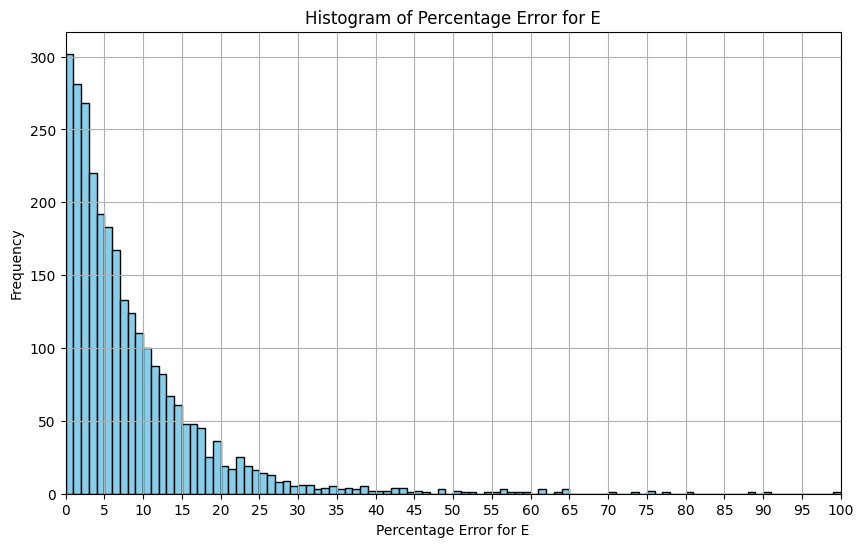

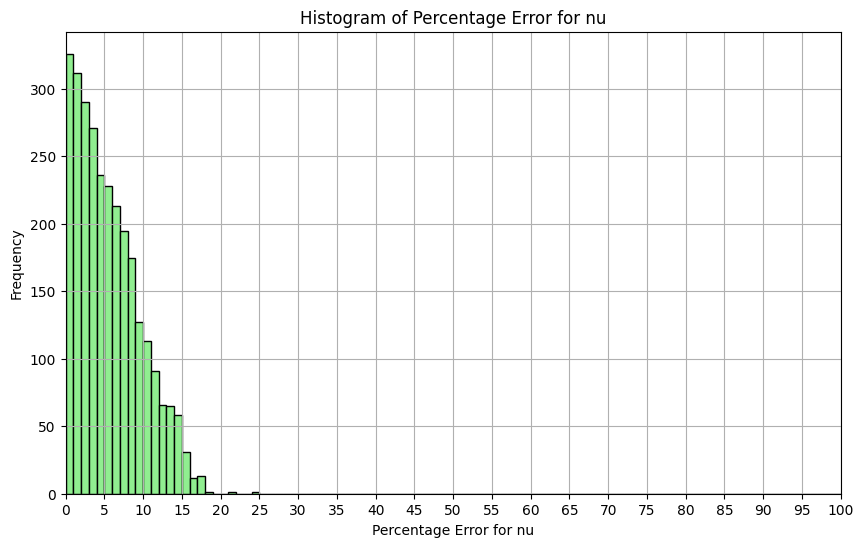

Maximum Percentage Error for E: 384.7097396850586
Minimum Percentage Error for E: 0.0045956138711634375
Maximum Percentage Error for mu: 24.95050726996528
Minimum Percentage Error for mu: 0.004475911458333334


In [ ]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'polymers_xgb_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('polymers_xgb_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **only nu scaled**

In [ ]:
# X = data[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# Y = data[['E', 'mu']]

# # Assuming dataf is your DataFrame
# data['E'] /= 10
data['nu'] *= 10000
X = data[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'nu']]
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
data

rho      E      nu    a    b    c        f1        f2        f3  \
0        920.000  1.000  4000.0  1.0  2.0  8.0  0.987485  0.988297  0.988952   
1        900.000  1.380  4200.0  1.0  2.0  8.0  0.982318  0.982887  0.983525   
2       1400.000  2.800  4000.0  1.0  2.0  8.0  0.978755  0.980834  0.982996   
3       1490.000  6.000  3500.0  1.0  2.0  8.0  0.961999  0.962285  0.965113   
4       1740.000  0.800  4900.0  1.0  2.0  8.0  0.991499  0.992805  0.994411   
...          ...    ...     ...  ...  ...  ...       ...       ...       ...   
282492  1159.775  1.091  4050.0  4.0  8.0  9.0  0.999135  0.999257  0.999276   
282493  1181.303  6.121  4080.0  4.0  8.0  9.0  0.995207  0.995392  0.995952   
282494  1296.140  5.646  3860.0  4.0  8.0  9.0  0.996725  0.997005  0.997064   
282495  1906.271  5.209  4210.0  4.0  8.0  9.0  0.997794  0.997899  0.997914   
282496  1403.680  3.130  3720.0  4.0  8.0  9.0  0.998300  0.998464  0.998616   

              f4  ...       f21       f22       f23       f24       f25  \
0       0.989568  ...  1.005184  1.006504  1.007279  1.008231  1.008527   
1       0.984575  ...  1.003252  1.004691  1.008078  1.009359  1.009531   
2       0.983527  ...  1.009662  1.010879  1.011256  1.013431  1.014195   
3       0.967011  ...  1.008717  1.008762  1.016295  1.017102  1.017695   
4       0.995036  ...  1.004288  1.004557  1.004758  1.005418  1.006616   
...          ...  ...       ...       ...       ...       ...       ...   
282492  0.999282  ...  1.000437  1.000555  1.000614  1.000740  1.000786   
282493  0.997210  ...  1.002223  1.002491  1.002730  1.002887  1.002903   
282494  0.997664  ...  1.000811  1.001316  1.001402  1.002016  1.002673   
282495  0.997934  ...  1.000918  1.000998  1.001136  1.001159  1.001771   
282496  0.998649  ...  1.000552  1.000556  1.000887  1.000966  1.001193   

             f26       f27       f28       f29       f30  
0       1.008992  1.010188  1.010613  1.011200  1.011248  
1       1.011175  1.012255  1.013992  1.015662  1.016843  
2       1.015234  1.016604  1.016993  1.018041  1.018829  
3       1.024019  1.024360  1.026227  1.027848  1.031468  
4       1.007267  1.008403  1.008599  1.008618  1.008808  
...          ...       ...       ...       ...       ...  
282492  1.000854  1.000856  1.000905  1.000919  1.000943  
282493  1.003380  1.003422  1.003788  1.004615  1.005007  
282494  1.002797  1.003127  1.003227  1.003773  1.004100  
282495  1.001987  1.002047  1.002200  1.002286  1.002327  
282496  1.001235  1.001359  1.001370  1.001565  1.001672  

[282497 rows x 36 columns]

In [ ]:
y_test

array([[3.256e+00, 3.730e+03],
       [9.680e-01, 4.310e+03],
       [4.599e+00, 4.140e+03],
       ...,
       [3.248e+00, 3.810e+03],
       [6.309e+00, 4.300e+03],
       [2.950e+00, 4.440e+03]])

In [ ]:
xgb_model = XGBRegressor(n_estimators=150000, random_state=42, learning_rate=0.003)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 0.13212570166031032
Mean Squared Error for mu: 82310.8951480966


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 0.2569508544668687
Mean Absolute Error for mu: 0.023145421883642145
Standard Deviation for E: 0.25714853151185885
Standard Deviation for mu: 0.016955829890627706
Mean Absolute percentage Error for E: 9.23313286558067
Mean Absolute percentage Error for mu: 5.625903227527546
Mode Percentage Error for E: ModeResult(mode=1.0, count=289) 
Mode Percentage Error for E: ModeResult(mode=1.7, count=43) 
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        3.256     3.345789  0.089789      0.373      0.429054  0.056054   
1        0.968     0.912580  0.055420      0.431      0.422671  0.008329   
2        4.599     4.406586  0.192414      0.414      0.420450  0.006450   
3        6.276     6.215898  0.060102      0.361      0.398823  0.037823   
4        3.440     3.360131  0.079869      0.394      0.400624  0.006624   
...        ...          ...       ...        ...           ...       ...   
2820     6.235     6.612876  0.377876      0

Median Percentage Error for E: 5.765257236309015
Median Percentage Error for mu: 4.883339185393258
Mean Absolute Error for E: 0.2569508544668687
Mean Absolute Error for mu: 0.023145421883642145
Standard Deviation for E: 0.25714853151185885
Standard Deviation for mu: 0.016955829890627706


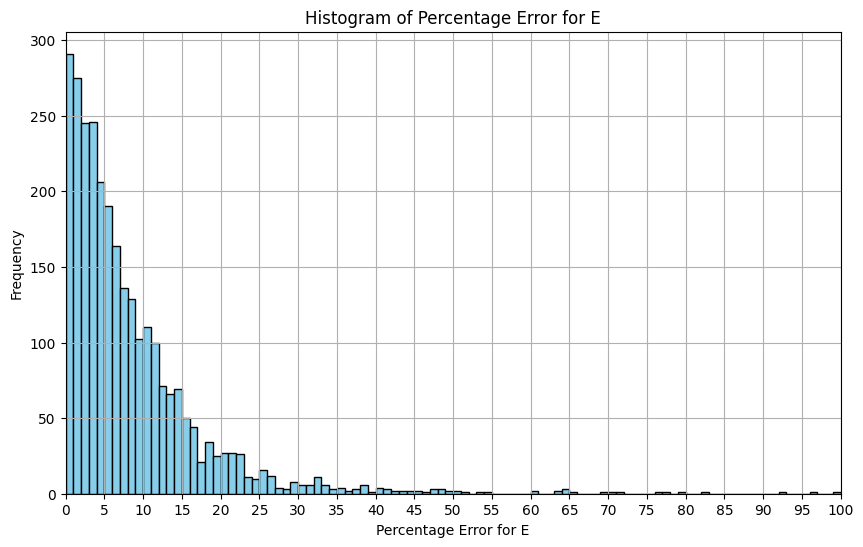

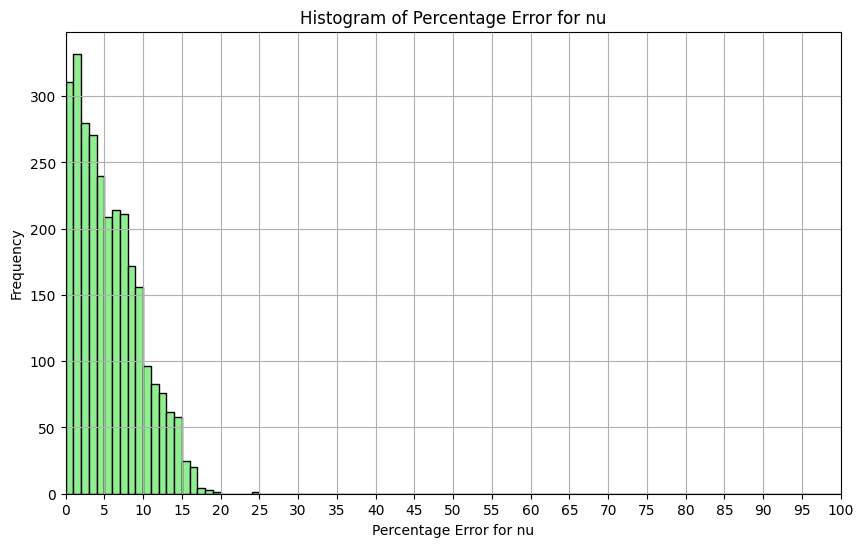

Maximum Percentage Error for E: 401.8806954224905
Minimum Percentage Error for E: 0.006214342198850873
Maximum Percentage Error for mu: 24.271131727430557
Minimum Percentage Error for mu: 0.0009742149939903847


In [ ]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'polymers_xgb_nu_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('polymers_xgb_nu_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>